# RDS DIGITAL SPECTROMETER JUPYTER NOTEBOOK

## RDS Header Block

In [1]:
# RYTHER DIGITAL SPECTROMETER SOFTWARE INTERACTIVE VERSION
# Author - Chandru Narayan
# TEMPLATE FOR SCS STUDENTS
# CN Version_1  Initial Release v1
#
#    073122 CN v1 Initial release


## Importing Libraries and Notebooks

In [2]:
import import_ipynb
from IPython.core.display import Image
from IPython.core.display import display
from IPython.display import IFrame
#import PIL
from PIL import Image as pilimg
from PIL import ImageDraw as pildraw
from PIL import ImageFont as pilfont
import picamera
import os, sys
import time
from datetime import datetime

class StopExecution(Exception):
    def _render_traceback_(self):
        pass
    

In [3]:
# RDS LIBRARY FUNCTIONS FOR RDS DIGITAL SPECTROMETER SOFTWARE INTERACTIVE VERSION
# Author - Chandru Narayan
# TEMPLATE FOR FCSR STUDENTS
# CN Version_11i  12/1/2019 cloned from automated version v11
# IMPORT rdsLIB AND rdsCFG HERE
import rdslibv1

importing Jupyter notebook from rdslibv1.ipynb


## RDS Configuration Parameters

In [4]:
###
#    RYTHER DIGITAL TELESCOPE SOFTWARE CONFIG SECTION
#    TO BE USED IN THE INTERACTIVE VERSION ONLY
#    FOR DETAILED DESCRIPTION OF PARMS SEE BDS CONFIG DOC 
###

#
# NAMING
#
source = 'daylight'      
element = 'daylight'                    
desc = 'Daylight Spectrum' 

#
# CAMERA
#
shutter = 500000

#
# CALIBRATION
#
wavelength_factor = 0.757
spectrum_angle = 0
slit_topadj = 60
slit_botadj = -60

#
# PLOTS
#
samp_th = 0.1
wlen_th = 10



## RDS File Output Names

In [5]:
# STEP 1. SETUP FILE BASENAMES WITH TIMESTAMPS
#       setup the source or basename for files
#       make it indicative of the spectrum you are taking
#       keep it short but meaningful. Do not name "a1" etc!
#source = 'cfls'

# Filenames be appended with date and time 
# such that they will not be overwritten 
now = datetime.now()
name = source + now.strftime("%m%d%H%M%S")
raw_filename = name + "_raw"
rawinv_filename = name + "_rawinv"
ovl_filename = name + "_ovl"
ovlinv_filename = name + "_ovlinv"
cht_filename = name + "_cht"
tbl_filename = name + "_tbl"
par_filename = name + "_par"
pks_filename = name + "pks"
clr_filename = name + "clr"

In [6]:
################## STUDENT TO ADD EDITS BELOW ################################
## WRITE A STATEMENT TO PRINT THE 4 OUTPUT NAMES FROM THE BDS SOFTWARE TO FAMILIARIZE YOURSELF

print(raw_filename)
print(rawinv_filename)
print(ovl_filename)
print(ovlinv_filename)
print(cht_filename)
print(tbl_filename)
print(par_filename)
print(pks_filename)
print(clr_filename)

daylight0816184218_raw
daylight0816184218_rawinv
daylight0816184218_ovl
daylight0816184218_ovlinv
daylight0816184218_cht
daylight0816184218_tbl
daylight0816184218_par
daylight0816184218pks
daylight0816184218clr


In [7]:
################## STOP HERE STUDENT/INSTRUCTOR TO VALIDATE STEP 1 ####################
## VALIDATE THE NAMES OF FILES TO BE CREATED - DO THEY LOOK RIGHT ??? ##

# DO NOT GO FORWARD UNTIL INSTRUCTOR VALIDATES

## Creating the Spectrometer Camera Object

In [8]:
# STEP 2. CREATE THE CAMERA OBJECT
#         CAPTURE THE RAW SPECTRUM IMAGE
#         THIS WILL BE EXAMINED FOR ANY ADJUSTMENTS NEEDED
#         FOR EXAMPLE IMAGE BRIGHTNESS LIGHT LEAKAGE ETC
#         DISPLAY CAPTURED IMAGE

In [9]:
#         Get camera object. Note that this can only be executed ONCE per run
#         YOU SHOULD NOT RUN IT AGAIN UNLESS THE CAMERA IS CLOSED WHICH
#         THIS STATEMENT IS AT THE VERY BOTTOM OF THIS FILE
try:
    camera = picamera.PiCamera()
except:
    print("Exception in opening camera object")
    print("Closing and Recreating Camera Object")
    camera.close()
    camera = picamera.PiCamera()
finally:
    print("Camera object created")


Camera object created


In [10]:
#          Set the shutter speed of the camera.
#          Use 100000 for a medium bright spectrum
#shutter = 5000
camera.shutter_speed = shutter
#         flip the image laterally as my analysis software reads with slit on the right!
camera.hflip = True
#         capture image with a predetermined size suitable for pixel counting analysis
raw_jpg_filename = raw_filename + ".jpg"
camera.capture(raw_jpg_filename, resize=(1296, 972))
#camera.capture(raw_jpg_filename, resize=(800, 600))

In [11]:
camera.hflip = False
#         capture image with a predetermined size suitable for pixel counting analysis
rawinv_jpg_filename = rawinv_filename + ".jpg"
camera.capture(rawinv_jpg_filename, resize=(1296, 972))
#camera.capture(raw_jpg_filename, resize=(800, 600))

## Obtaining the Raw Image of the Spectrum

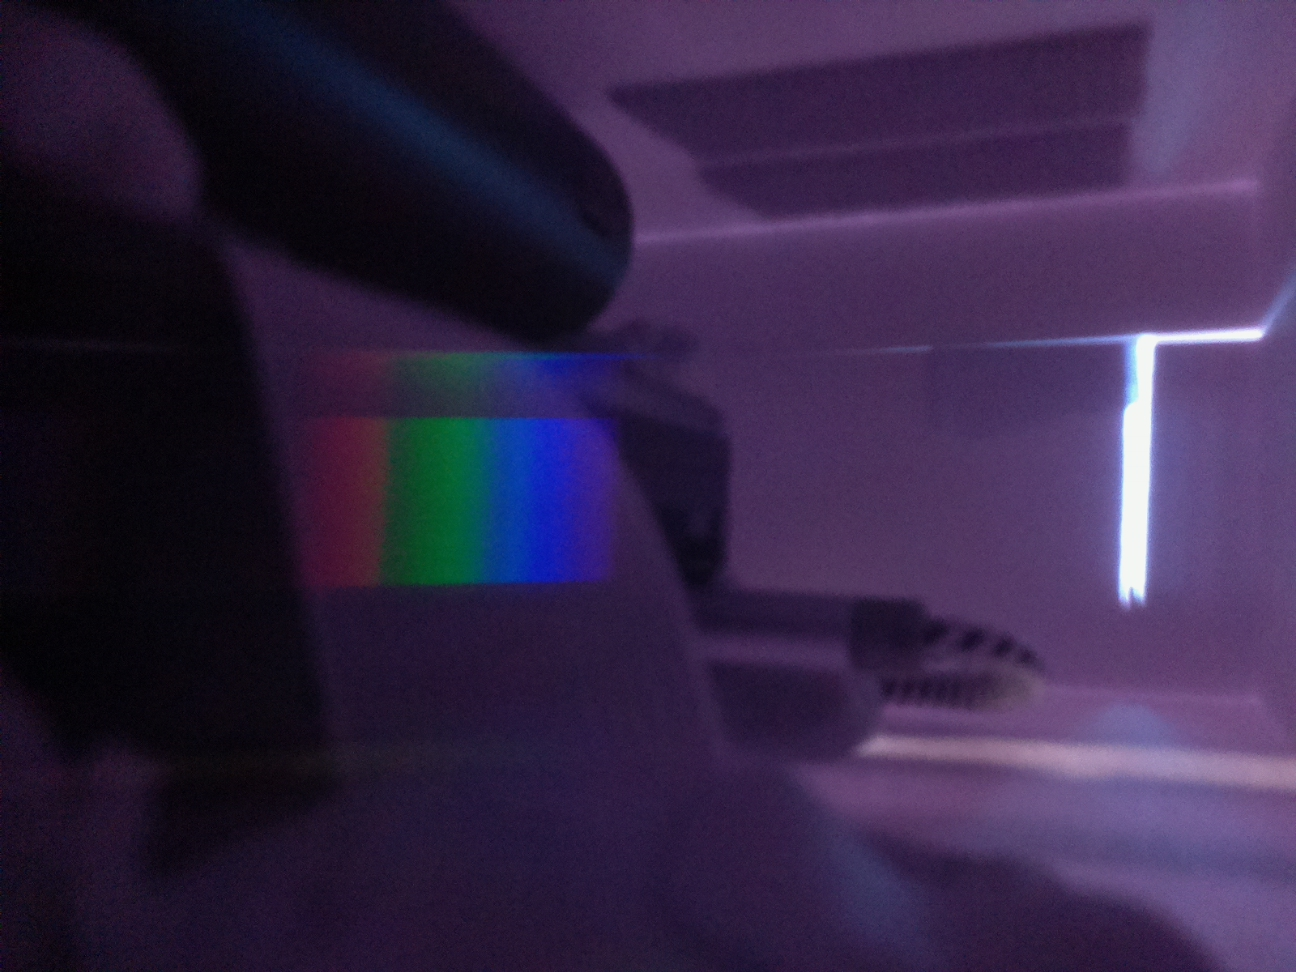

Title:		 DAYLIGHT SPECTRUM
BDS parameters used for this run:
Spectrum Base Name is          	 daylight0816184218
Camera Shutter is:             	 500000
Slit Top Adjustment is:        	 60
Slit Bottom Adjustment is:     	 -60
Camera Spectrum Angle is:      	 0
Camera Wavelength Factor is:   	 0.757
Amplitude Threshold is:        	 0.1
Wavelength Threshold is:       	 10


In [12]:
#       view image and apply putty or tape inside spectroscope to prevent light leakage
#       remember - image is flipped laterally from left right!
display(Image(raw_jpg_filename))
rdslibv1.display_bds_params(name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)

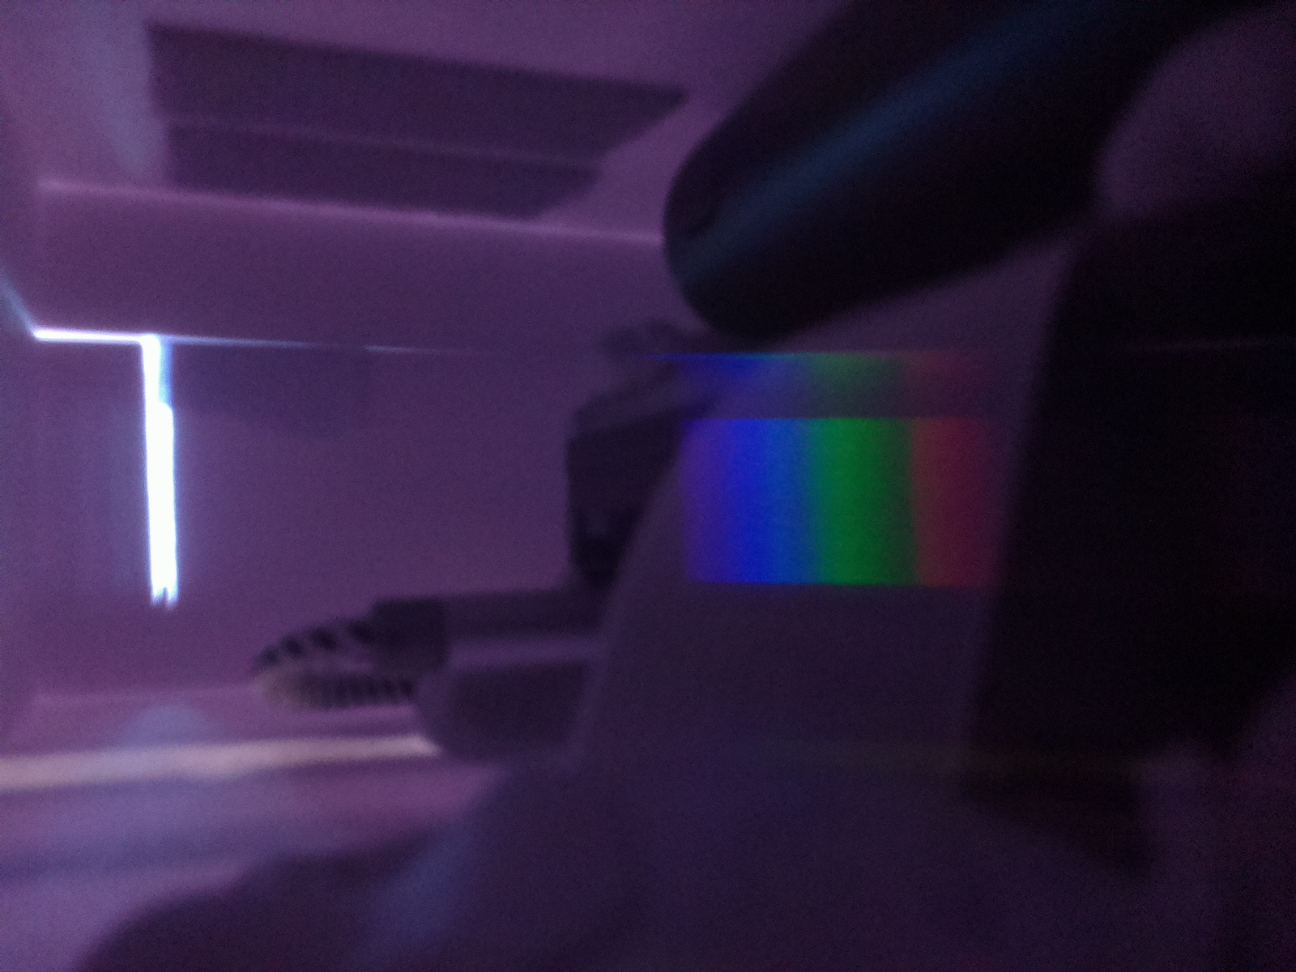

Title:		 DAYLIGHT SPECTRUM
BDS parameters used for this run:
Spectrum Base Name is          	 daylight0816184218
Camera Shutter is:             	 500000
Slit Top Adjustment is:        	 60
Slit Bottom Adjustment is:     	 -60
Camera Spectrum Angle is:      	 0
Camera Wavelength Factor is:   	 0.757
Amplitude Threshold is:        	 0.1
Wavelength Threshold is:       	 10


In [13]:
#       view image and apply putty or tape inside spectroscope to prevent light leakage
#       remember - image is flipped laterally from left right!
display(Image(rawinv_jpg_filename))
rdslibv1.display_bds_params(name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)

In [14]:

################## STOP HERE STUDENT/INSTRUCTOR TO VALIDATE STEP 2 ####################
## DID THE IMAGE APPEAR ??
## IS THE IMAGE OF THE SPECTRUM VISIBLE ??
## IS THE IMAGE FLIPPED LATERALLY ?
## DOES THE SLIT LOOK OVER EXPOSED ??
## DOES THE SPECTRUM LOOK TOO DIM ??

# DO NOT GO FORWARD UNTIL INSTRUCTOR VALIDATES

## Draw Visual Aperture and Measure Emission Spectral Peaks 

In [15]:
# STEP 3. PROCESS THE IMAGE AND LOCATE THE SLIT (APERTURE)
#         READ RAW JPG FILE OBTAINED IN A PIXEL ARRAY
#         RECORD THE PIXEL WIDTH AND HEIGHT
#         NARROW THE PIXEL WINDOW FOR SLIT TOP AND BOTTOM
#         FOR EXAMPLE IMAGE BRIGHTNESS LIGHT LEAKAGE ETC
#         DISPLAY CAPTURED IMAGE

In [16]:
#         READ RAW JPG FILE OBTAINED IN A PIXEL ARRAY
im = pilimg.open(raw_jpg_filename)
pic_pixels = im.load()
#         record the pixel width and height
width = im.size[0]
height = im.size[1]
print("width is %d, height is %d" % (width, height))
#        The slit needs to be shortened in height at times due to light leakage
#        inside spectrometer. This small adjustment can be made here. 
#        bigger negative numbers for smaller for bottom slit 
#        bigger positive numbers for smaller top slit 
#        for daylight or bright spectrum we need to narrow the slit greatly.
#        default values are set above
#        Adjust and uncomment below if you need
# FINE CALIBRATION
#
#wavelength_factor = 0.77
#spectrum_angle = -0.09
#slit_topadj = 30
#slit_botadj = -35

#        call library function to find the aperture in the raw image (pixel array)
aperture = rdslibv1.find_aperture(pic_pixels, width, height, slit_topadj, slit_botadj)
#        draw the aperture
draw = pildraw.Draw(im)
rdslibv1.draw_aperture(aperture, draw)


width is 1296, height is 972
aperture_x b4 avg is: 1126
aperture_x1 is: 1119
aperture_x2 is: 1145
avg aperture_x is: 1132.0
spectrum_top is 393 spectrum bottom is 587
adj spectrum_top is 453 adj spectrum bottom is 527


In [17]:
#        Draw scan line using the Spectrum angle
#        This is the angle that the camera and diffration grating makes with the light path
#        The Spectrum Angle trignometric tangent of the angle the camera and diffration grating makes 
#        with the line of sight to the entry slit. This usually does not need to be changed very much 
#        as it manipulates where in the observation area the spectrum falls. It only needs to be 
#        approximate such that pixel counter can find it
#        default values are set above
#        Adjust and uncomment below if you need
#        draw the scan lline
rdslibv1.draw_scan_line(aperture, draw, spectrum_angle)

In [18]:
#        The wavelength_factor is the variable used for calibrating the spectroscope such that 
#        the calibration spectral line matches the known standard for that emission spectrum
#        The wavelength_factor is close to 0.90 for the 1000 lines/mm diffration grating
#        The wavelength_factor is close to 0.60 for the 500 lines/mm diffration grating
#        default values are set above
#        Adjust and uncomment below if you need
#
try:
    results, max_result = rdslibv1.draw_graph(draw, pic_pixels, aperture, spectrum_angle, wavelength_factor)
except:
    camera.close()
    print("Exception while creating an aperture")
    print("This run **** TERMINATED PREMATURELY **** ...")
    print("Maybe the result of misaligned light path a very dim spectrum")
    print("Adjust Light Path Alignment OR Increase Shutter parameter and try again")    
    raise StopExecution
else:
    print("Producing graphical result")

Producing graphical result


In [19]:
#        Display actual and ideal targets for camera exposure corrections
rdslibv1.inform_user_of_exposure(max_result)

ideal exposure between 0.15 and 0.30
exposure= 0.5217402114307322
consider reducing shutter time



In [20]:
from PIL import ImageOps as pilimgops
#       Create the spectrum image overlaid with aperture and scan line
ovl_jpg_filename = ovl_filename + ".jpg"
rdslibv1.save_image_with_overlay(im, ovl_jpg_filename)
#       Create the spectrum image overlaid with aperture and scan line
ovlinv_jpg_filename = ovlinv_filename + ".jpg"
im_mirror = pilimgops.mirror(im)
rdslibv1.save_image_with_overlay(im_mirror, ovlinv_jpg_filename)


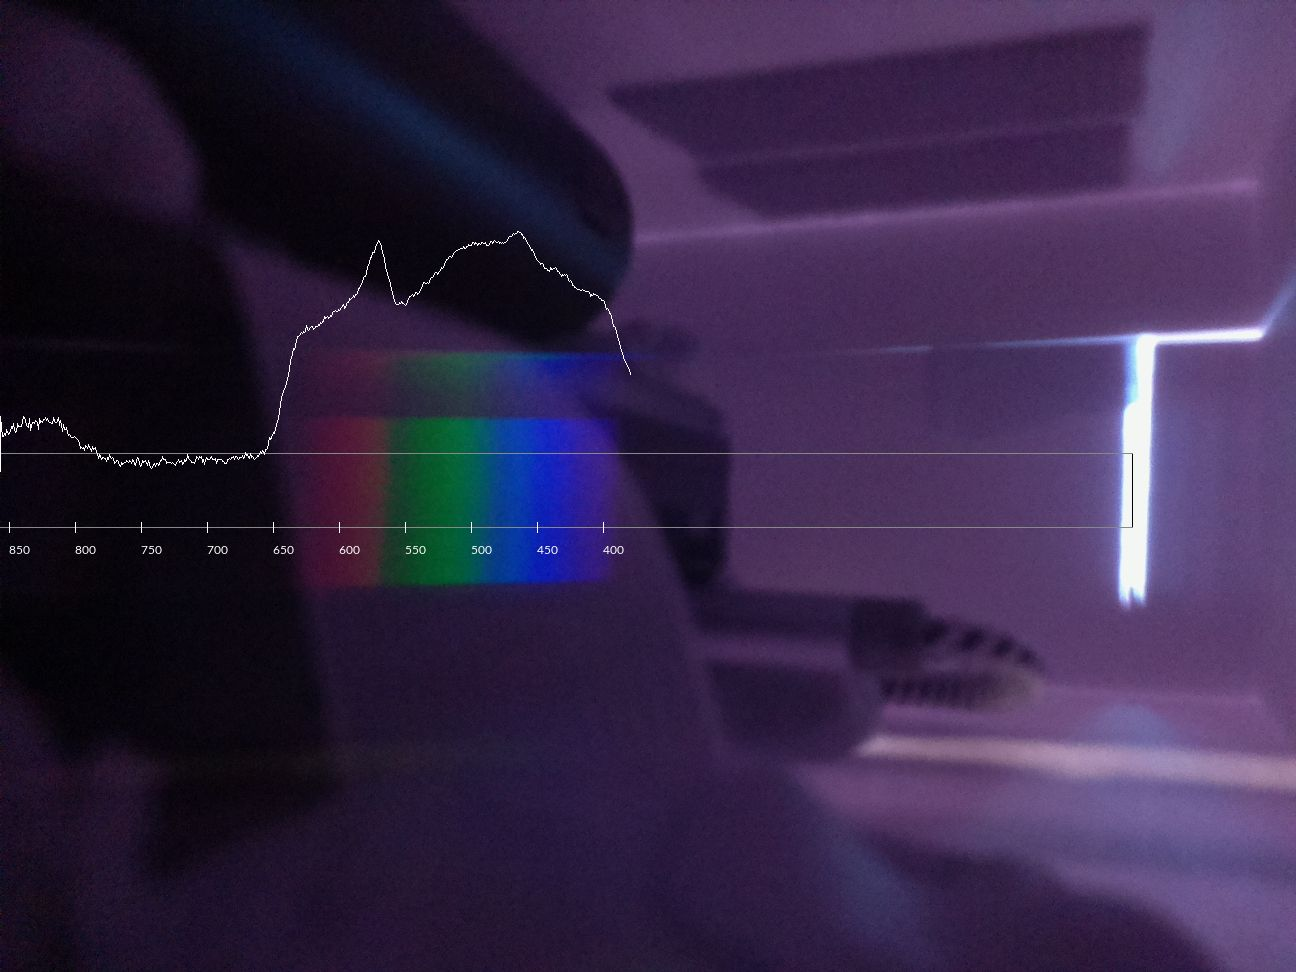

Title:		 DAYLIGHT SPECTRUM
BDS parameters used for this run:
Spectrum Base Name is          	 daylight0816184218
Camera Shutter is:             	 500000
Slit Top Adjustment is:        	 60
Slit Bottom Adjustment is:     	 -60
Camera Spectrum Angle is:      	 0
Camera Wavelength Factor is:   	 0.757
Amplitude Threshold is:        	 0.1
Wavelength Threshold is:       	 10


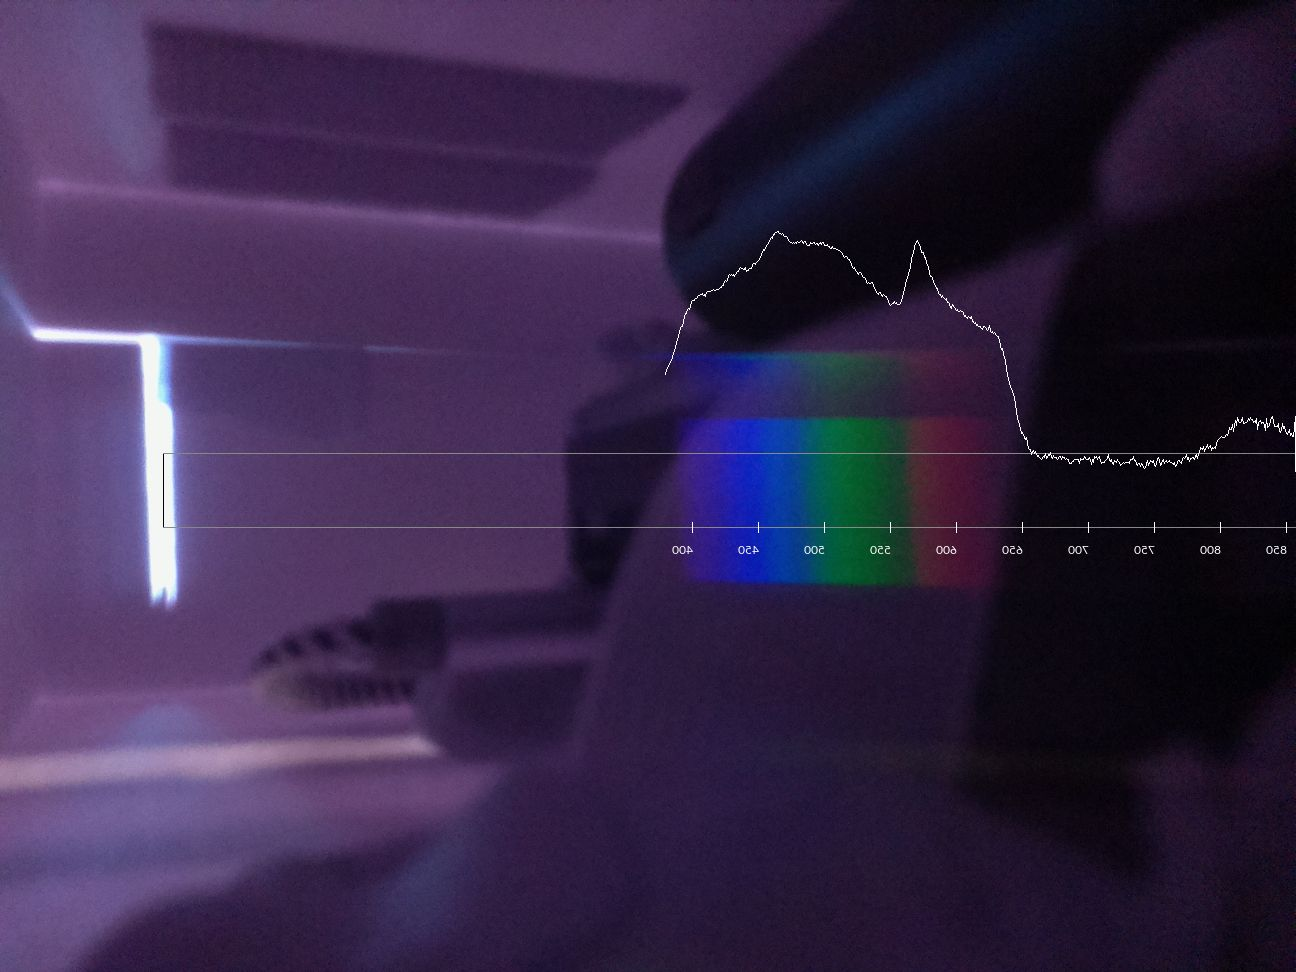

In [21]:
#       View the Overlaid image fix parameters and rerun STEP 3 ONLY from the beginning as needed
display(Image(ovl_jpg_filename))
rdslibv1.display_bds_params(name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)
display(Image(ovlinv_jpg_filename))

In [22]:
################## STOP HERE STUDENT/INSTRUCTOR TO VALIDATE STEP 3 ####################
## IS THE ACTUAL EXPOSURE WITHIN THE TARGET LIMITS ??
## DID A RECTANGULAR WINDOW APPEAR OVERLAID ON THE IMAGE  ENCLOSING THE SPECTRUM ??
## IS THE SCAN LINE VISIBLE ??
## IS THE SCAN LINE ALIGNED WITH THE SLIT ??
## IF NOT WE HAVE TO MAKE ADJUSTMENTS BEFORE PROCEEDING
## READ INSTRUCTIONS IN VARIOUS CELLS ON THIS STEP
## MAKE CHANGES AND ASK FOR ME TO VALIDATE BEFORE PROCEEDING

# DO NOT GO FORWARD UNTIL INSTRUCTOR VALIDATES

## Display Emission Spectrum and Compare with NIST Standard values

In [23]:
# STEP 4 FINAL STEP! NORMALIZE AND CREATE/DISPLAY SPECTRUM CHART
# MAKE ADJUSTMENTS AND RERUN FROM THE BEGINNING IF NEEDED
normalized_results = rdslibv1.normalize_results(results, max_result)

In [24]:
#       Create the spectrum chart overlaid with the proper wavelengths 
#       and color map according to frequency
cht_png_filename = cht_filename + ".png"
rdslibv1.export_diagram(cht_png_filename, normalized_results)

Title:		 DAYLIGHT SPECTRUM
BDS parameters used for this run:
Spectrum Base Name is          	 daylight0816184218
Camera Shutter is:             	 500000
Slit Top Adjustment is:        	 60
Slit Bottom Adjustment is:     	 -60
Camera Spectrum Angle is:      	 0
Camera Wavelength Factor is:   	 0.757
Amplitude Threshold is:        	 0.1
Wavelength Threshold is:       	 10


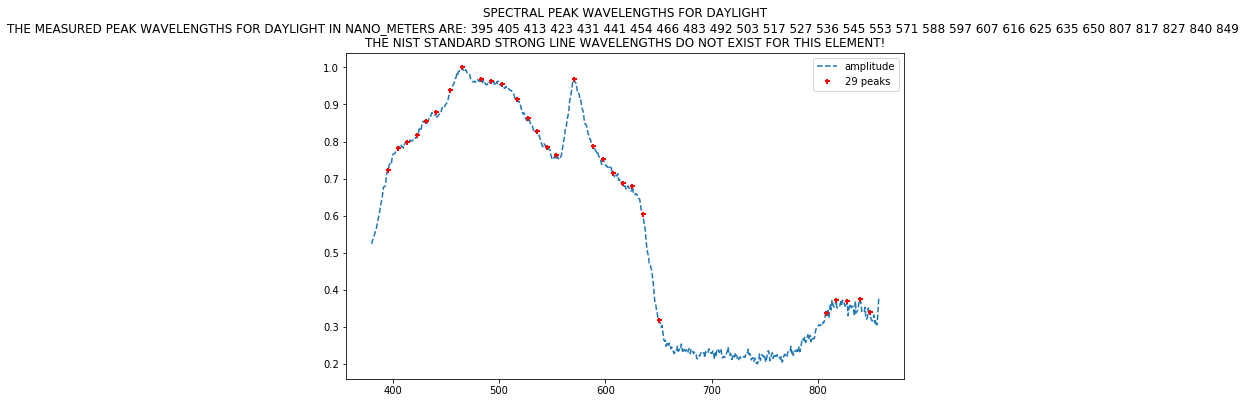

In [25]:
#       Print the Spectral Peaks table of wavelengths 
#       for current spectral image obtained
csv_tbl_filename = tbl_filename + ".csv"
rdslibv1.export_csv(tbl_filename, normalized_results)

#       Uncomment and change these thresholds if necessary if
#       you would like to increase or decrease the number
#       of Spectral peaks found

#samp_th = 0.2
#wlen_th = 10
#       Call function to draw the Spectral Peaks which will
#       Plot the peaks and return a list of Peak Wavelengths
pks_png_filename = pks_filename + ".png"
pwl, t1, t2 = rdslibv1.draw_spectral_line_peaks(element,csv_tbl_filename, pks_png_filename, desc, samp_th, wlen_th)
rdslibv1.display_bds_params(name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)
par_txt_filename = par_filename + ".txt"
rdslibv1.write_bds_params(par_txt_filename,name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)

<Figure size 720x432 with 0 Axes>

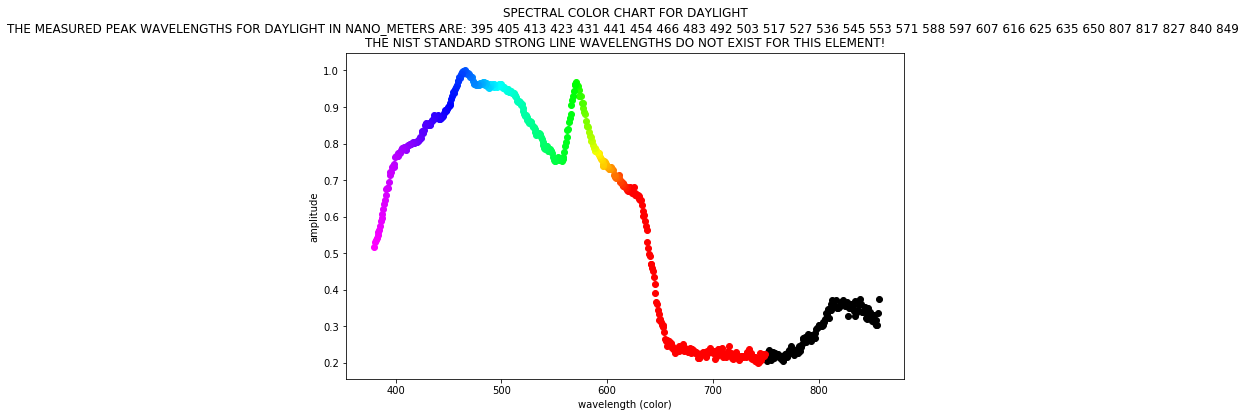

Title:		 DAYLIGHT SPECTRUM
BDS parameters used for this run:
Spectrum Base Name is          	 daylight0816184218
Camera Shutter is:             	 500000
Slit Top Adjustment is:        	 60
Slit Bottom Adjustment is:     	 -60
Camera Spectrum Angle is:      	 0
Camera Wavelength Factor is:   	 0.757
Amplitude Threshold is:        	 0.1
Wavelength Threshold is:       	 10


In [26]:
#display(Image(cht_png_filename))
#bdslibv2.display_bds_params(name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)
clr_png_filename = clr_filename + ".png"
rdslibv1.draw_spectral_color_fill_chart(element,csv_tbl_filename, clr_png_filename, desc, samp_th, wlen_th, t1, t2)
rdslibv1.display_bds_params(name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)

In [27]:
pattern = pilimg.open(cht_png_filename).convert('RGBA')
#txt = pilimg.new('RGBA', pattern.size, (255,255,255,0))
size = width, height = pattern.size
draw = pildraw.Draw(pattern,'RGBA')
font = pilfont.truetype('/usr/share/fonts/truetype/lato/Lato-Regular.ttf', 12)
#print(size)
draw.text((0,0), desc.upper(), font=font, fill='#000')
draw.text((0,20), t1, font=font, fill='#000')
draw.text((0,40), t2, font=font, fill='#000')
#draw.text((0,100), "Hello World", (0, 0, 0, 0),font=font)
pattern.save(cht_png_filename)

In [28]:
camera.close()

In [29]:
################## STOP HERE STUDENT/INSTRUCTOR TO VALIDATE STEP 4 FINAL STEP ####################
## CONGRATULATIONS - YOU MADE A FANCY DIGITAL SPECTROSCOPE AND MADE YOUR FIRST MEASUREMENTS!
## 
## DID THE SPECTRAL CHART APPEAR ??
## DOES THE CHART LOOK CORRECT ??
## DOES IT MATCH WITH THE STANDARD FOR ELEMENTS FOUND IN THE STANDARD SPECTRUM ??
## IF NOT WE WILL MAKE ADJUSTMENTS TO PARAMETERS ABOVE AS DOCUMENTED
## MAKE CHANGES AND ASK FOR ME TO VALIDATE BEFORE PROCEEDING

# DO NOT GO FORWARD UNTIL INSTRUCTOR VALIDATES
# WHEN YOU HAVE GOOD RESULTS PRINT FROM THE "FILE->PRINT PREVIEW" FROM
# THE JUPYTER NOTEBOOK AND GET THIS NOTEBOOK PRINTED FOR VALIDATION!